In [1]:
import keras
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
% load_ext autoreload
% autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Historic Matches Data

In [2]:
data = pd.read_csv('data/wc_datathon_dataset_no_friendly.csv', delimiter=',', keep_default_na=False)
print('data keys: ', list(data))

labels = data[['team_1_win', 'draw', 'team_2_win']]
labels = np.asarray(labels)

data keys:  ['date', 'year', 'game', 'team_1', 'team_1_code', 'team_2', 'team_2_code', 'tournament', 'is_friendly', 'is_world_cup', 'team_1_home', 'team_2_home', 'is_neutral', 'team_1_goals', 'team_2_goals', 'team_1_betfair_odds', 'draw_betfair_odds', 'team_2_betfair_odds', 'team_1_win', 'draw', 'team_2_win']


In [3]:
data.head(3)

,date,year,game,team_1,team_1_code,team_2,team_2_code,tournament,is_friendly,is_world_cup,...,team_2_home,is_neutral,team_1_goals,team_2_goals,team_1_betfair_odds,draw_betfair_odds,team_2_betfair_odds,team_1_win,draw,team_2_win
0,2000-06-10,2000,1,Belgium,BE,Sweden,SE,Euro 2000,0,0,...,0,0,2,1,2.72,2.90,3.3,1,0,0
1,2000-06-11,2000,2,France,FR,Denmark,DK,Euro 2000,0,0,...,0,1,3,0,1.68,3.75,6.6,1,0,0
2,2000-06-11,2000,3,Netherlands,NL,Czechia,CZ,Euro 2000,0,0,...,0,0,1,0,1.80,3.45,5.9,1,0,0


In [59]:
import os.path
from utils.load_data import*

stats = []
stats = np.zeros([data.shape[0], 31*3])

if os.path.isfile('Inputs.csv'):
    stats = np.loadtxt('Inputs.csv', delimiter=',')
else:
    stats = create_elo_vectors(data, stats)
   
    np.savetxt('Inputs.csv', stats, delimiter=',')

## Create Training Vector

In [60]:
inputs = []
# inputs = np.asarray(data[['is_friendly', 'is_world_cup', 'team_1_home', 'team_2_home', 'is_neutral']])
inputs = np.asarray(data[['is_world_cup', 'team_1_home', 'team_2_home', 'is_neutral']])

In [61]:
inputs = np.concatenate([inputs, stats], axis=1)
inputs.shape

(5978, 97)

## Create Train, Val, Test Vectors

In [62]:
from numpy.random import randint, seed

seed(258)
ind = np.arange(inputs.shape[0])
np.random.shuffle(ind)

# val_ind = ind[:2183]
# test_ind = ind[2183:2183*2]
# train_ind = ind[2183*2:]
val_ind = ind[:897]
test_ind = ind[897:897*2]
train_ind = ind[897*2:]

In [63]:
x_val = inputs[val_ind]
y_val = labels[val_ind]

x_test = inputs[test_ind]
y_test = labels[test_ind]

x_train = inputs[train_ind]
y_train = labels[train_ind]

## Normalise Data

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[-1,1])
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

## Print Class Frequency

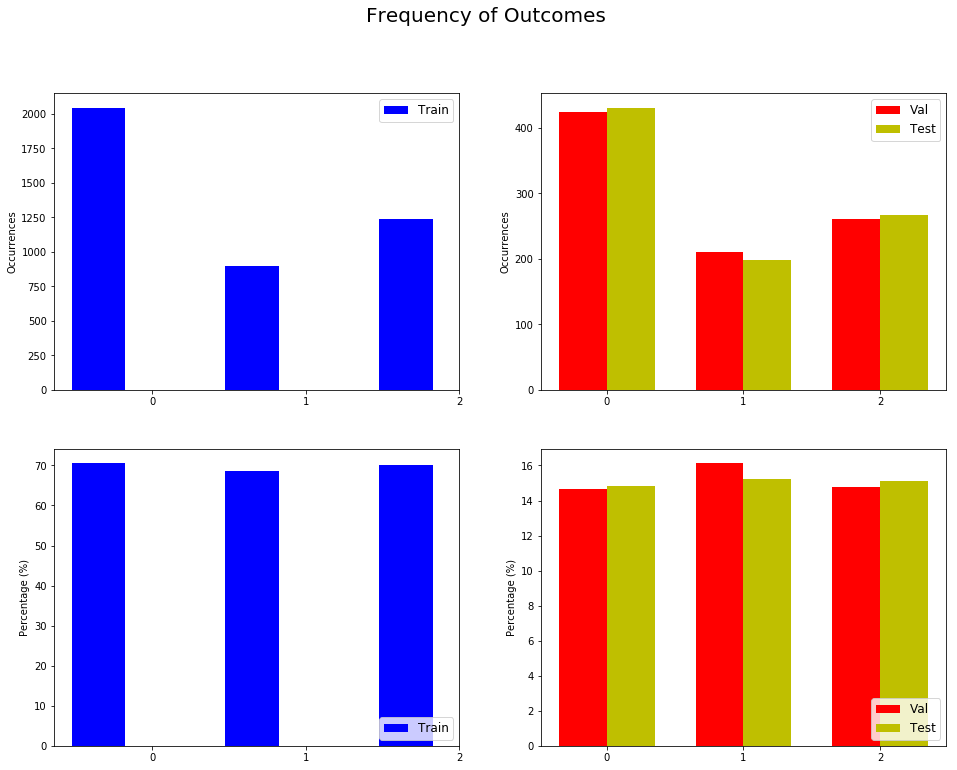

In [65]:
from utils.plots import*

plot_class_frequency(y_train, y_val, y_test)

## Train Models

In [66]:
from utils.model import *
from utils.train_models import *

models = {'linear_model': linear_model, 'tanh_model': tanh_model, 'sigmoid_model': sigmoid_model, \
          'softmax_model': softmax_model, 'relu_model': relu_model, 'CNN_model': CNN_model}

### Linear Model

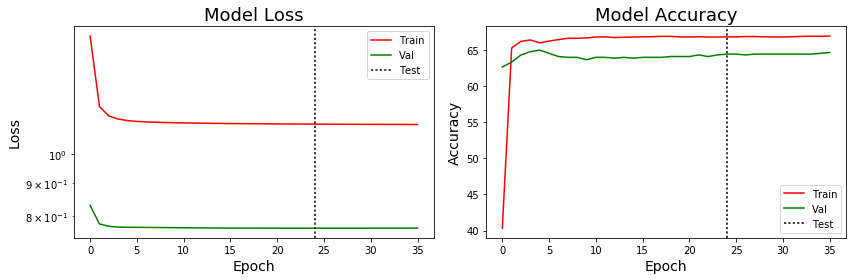

linear_model
Train Loss: 0.73408     Train Accuracy: 67.26%     Precision: 62.68%     Recall: 63.11%     F1-Score: 62.79%
  Val Loss: 0.76519       Val Accuracy: 64.44%     Precision: 60.59%     Recall: 60.73%     F1-Score: 60.64%
 Test Loss: 0.74253      Test Accuracy: 66.44%     Precision: 61.01%     Recall: 61.78%     F1-Score: 61.29%

Normalized confusion matrix


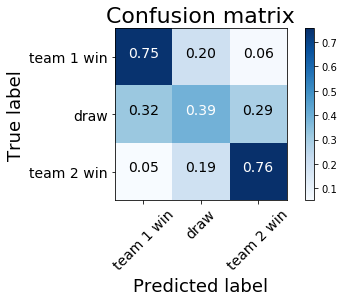


Normalized confusion matrix


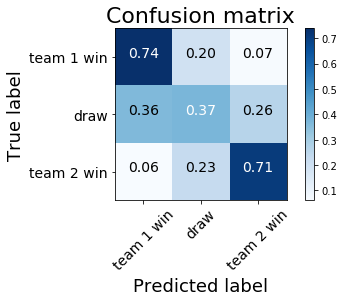


Normalized confusion matrix


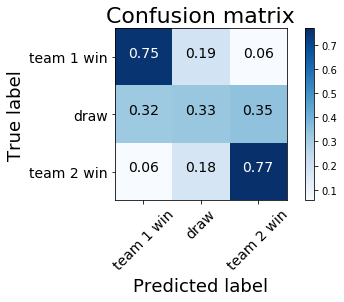

In [67]:
from utils.train_models import *

model = train_models(models['linear_model'], x_train, y_train, x_val, y_val, x_test, y_test)

### Tanh Model

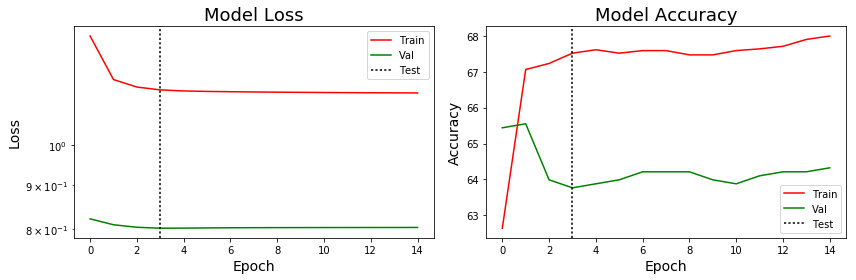

tanh_model
Train Loss: 0.76670     Train Accuracy: 67.45%     Precision: 59.39%     Recall: 60.59%     F1-Score: 59.46%
  Val Loss: 0.80263       Val Accuracy: 63.77%     Precision: 56.27%     Recall: 57.75%     F1-Score: 56.43%
 Test Loss: 0.77259      Test Accuracy: 66.56%     Precision: 58.75%     Recall: 59.88%     F1-Score: 58.53%

Normalized confusion matrix


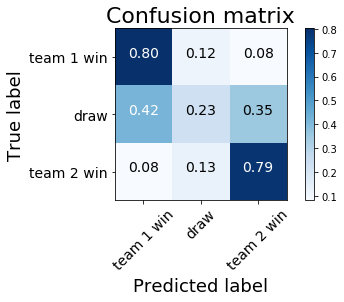


Normalized confusion matrix


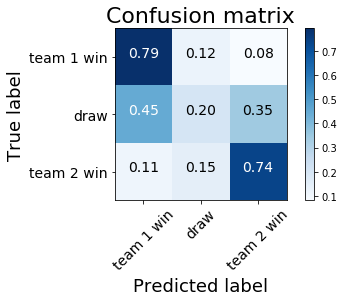


Normalized confusion matrix


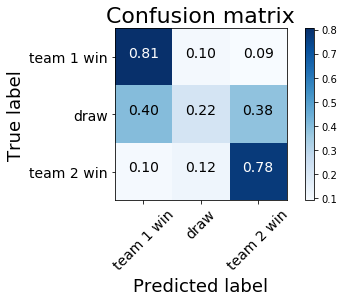

In [68]:
from utils.train_models import *

model = train_models(models['tanh_model'], x_train, y_train, x_val, y_val, x_test, y_test)

### Sigmoid Model

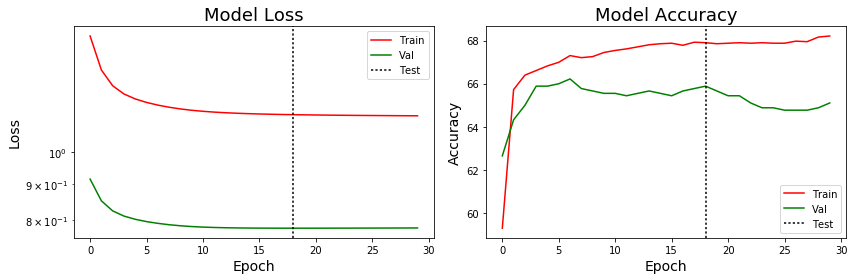

sigmoid_model
Train Loss: 0.74079     Train Accuracy: 68.36%     Precision: 60.75%     Recall: 61.73%     F1-Score: 60.84%
  Val Loss: 0.77927       Val Accuracy: 65.89%     Precision: 59.49%     Recall: 60.14%     F1-Score: 59.39%
 Test Loss: 0.75066      Test Accuracy: 68.00%     Precision: 60.75%     Recall: 61.80%     F1-Score: 60.71%

Normalized confusion matrix


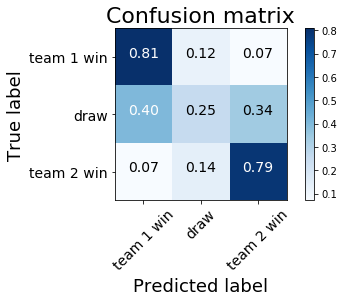


Normalized confusion matrix


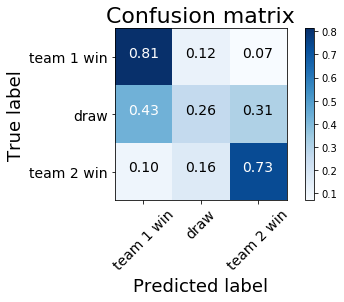


Normalized confusion matrix


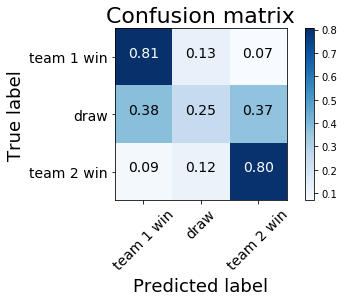

In [69]:
from utils.train_models import *

model = train_models(models['sigmoid_model'], x_train, y_train, x_val, y_val, x_test, y_test)

### Softmax

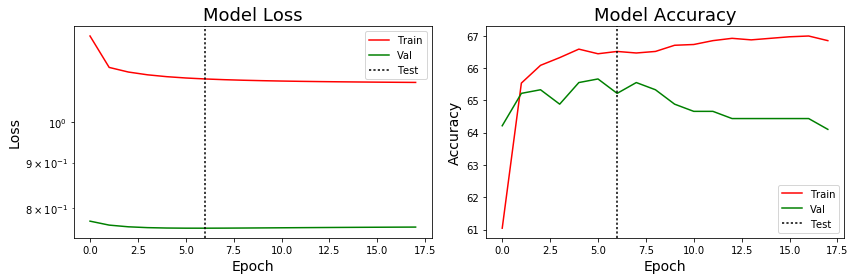

softmax_model
Train Loss: 0.72944     Train Accuracy: 67.61%     Precision: 62.43%     Recall: 63.14%     F1-Score: 62.69%
  Val Loss: 0.75878       Val Accuracy: 65.22%     Precision: 60.25%     Recall: 60.99%     F1-Score: 60.50%
 Test Loss: 0.74193      Test Accuracy: 64.77%     Precision: 58.79%     Recall: 59.81%     F1-Score: 59.15%

Normalized confusion matrix


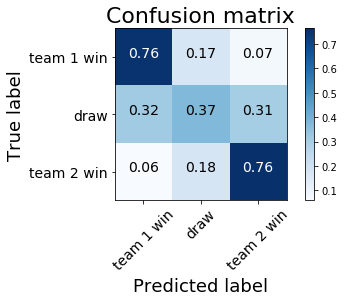


Normalized confusion matrix


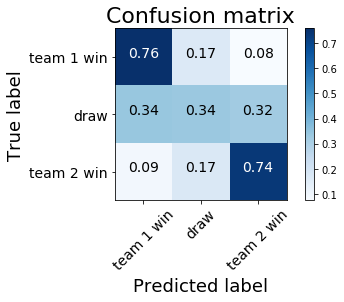


Normalized confusion matrix


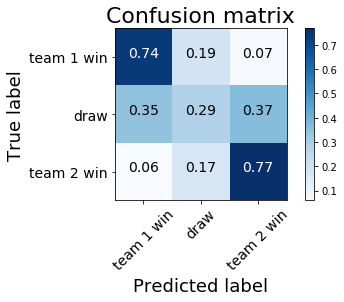

In [70]:
from utils.train_models import *

model = train_models(models['softmax_model'], x_train, y_train, x_val, y_val, x_test, y_test)

### ReLU Model

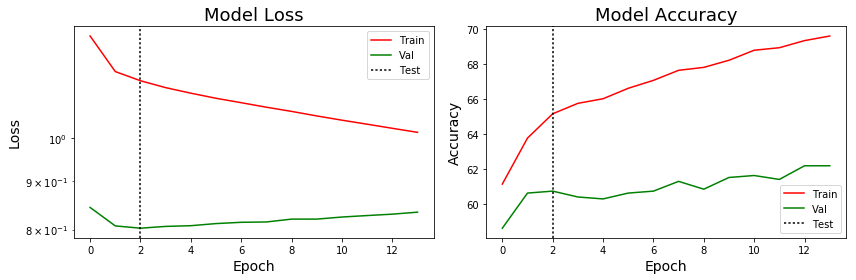

relu_model
Train Loss: 0.72912     Train Accuracy: 67.21%     Precision: 61.52%     Recall: 62.54%     F1-Score: 61.78%
  Val Loss: 0.80271       Val Accuracy: 60.76%     Precision: 54.87%     Recall: 56.15%     F1-Score: 55.32%
 Test Loss: 0.78342      Test Accuracy: 63.77%     Precision: 57.75%     Recall: 58.84%     F1-Score: 58.07%

Normalized confusion matrix


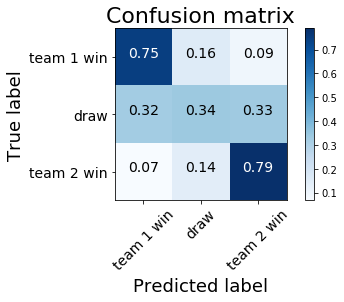


Normalized confusion matrix


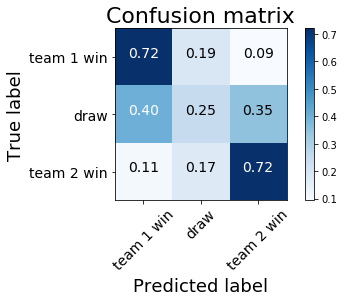


Normalized confusion matrix


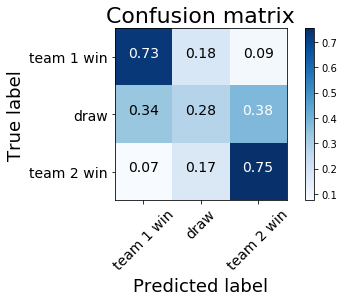

In [71]:
from utils.train_models import *

model = train_models(models['relu_model'], x_train, y_train, x_val, y_val, x_test, y_test)

### CNN Model

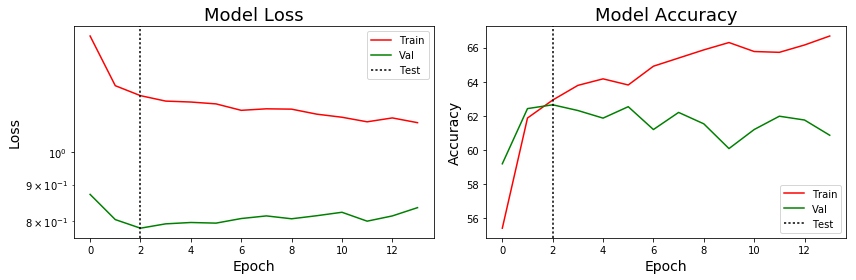

CNN_model
Train Loss: 0.71789     Train Accuracy: 67.50%     Precision: 62.83%     Recall: 63.24%     F1-Score: 62.95%
  Val Loss: 0.78221       Val Accuracy: 62.65%     Precision: 58.02%     Recall: 58.16%     F1-Score: 58.09%
 Test Loss: 0.74452      Test Accuracy: 65.77%     Precision: 60.76%     Recall: 61.35%     F1-Score: 60.98%

Normalized confusion matrix


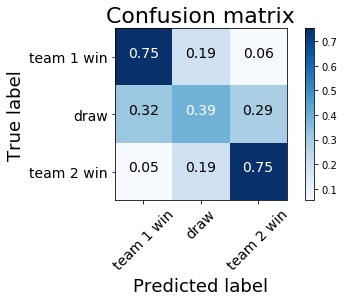


Normalized confusion matrix


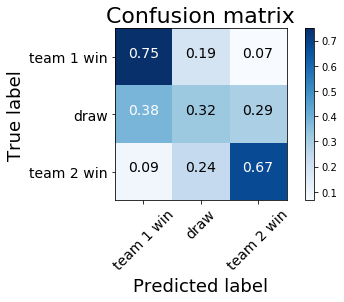


Normalized confusion matrix


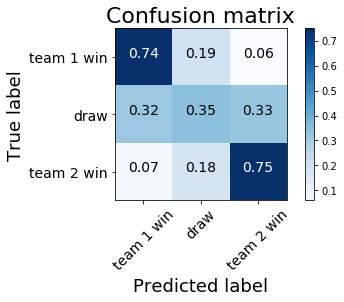

In [72]:
from utils.train_models import *

model = train_models(models['CNN_model'], x_train, y_train, x_val, y_val, x_test, y_test)

## Ensemble Models

### Training Data

     Loss: 0.72413
 Accuracy: 68.57%
Precision: 62.35%
   Recall: 63.20%
 F1-Score: 62.60%

Normalized confusion matrix


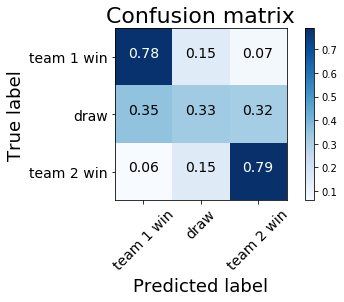

In [73]:
from utils.train_models import *
ensemble_v1(x_train, y_train)

### Validation Data

     Loss: 0.76887
 Accuracy: 63.99%
Precision: 58.16%
   Recall: 58.98%
 F1-Score: 58.42%

Normalized confusion matrix


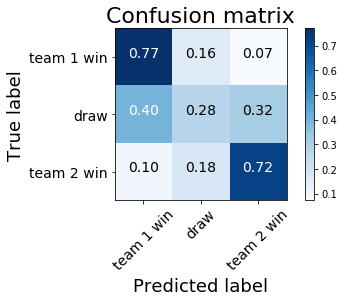

In [74]:
ensemble_v1(x_val, y_val)

### Test Data

     Loss: 0.74223
 Accuracy: 66.44%
Precision: 59.64%
   Recall: 60.75%
 F1-Score: 59.95%

Normalized confusion matrix


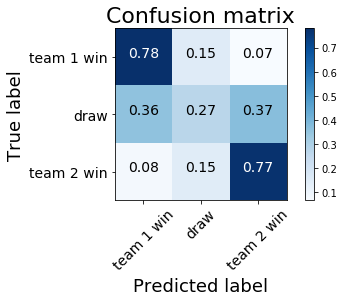

In [75]:
ensemble_v1(x_test, y_test)

## V2 Ensemble Model

### Training Data

     Loss: 0.71570
 Accuracy: 68.67%
Precision: 63.37%
   Recall: 64.10%
 F1-Score: 63.65%

Normalized confusion matrix


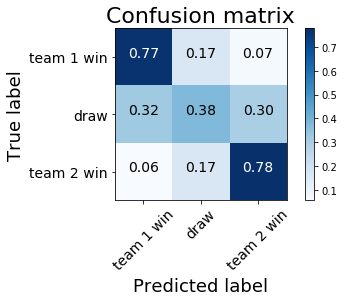

In [76]:
from utils.train_models import *
ensemble_v2(x_train, y_train)

### Validation Data

     Loss: 0.76450
 Accuracy: 63.99%
Precision: 59.21%
   Recall: 59.75%
 F1-Score: 59.44%

Normalized confusion matrix


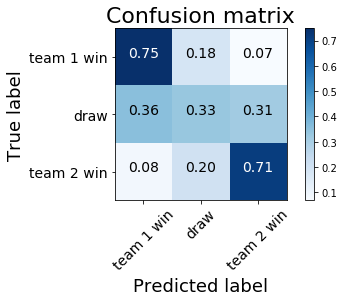

In [77]:
ensemble_v2(x_val, y_val)

### Test Data

     Loss: 0.73958
 Accuracy: 64.99%
Precision: 59.15%
   Recall: 60.00%
 F1-Score: 59.47%

Normalized confusion matrix


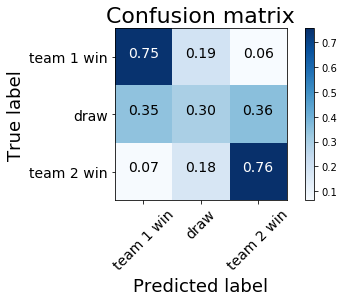

In [78]:
ensemble_v2(x_test, y_test)

## Predict World Cup 2018 Results

In [79]:
WC2018_games = pd.read_csv('Test.csv')

In [80]:
# Load 2018 ELO rankings
elo2018 = pd.read_csv('data/historic_elo/' + '2018.tsv', delimiter='\t', header=None, keep_default_na=False)

In [81]:
import os.path
from utils.load_data import*

WC2018_stats = []
WC2018_stats = np.zeros([WC2018_games.shape[0], 31*3])

WC2018_stats = create_elo_vectors(WC2018_games, WC2018_stats)

In [82]:
x_WC2018 = []
# x_WC2018 = np.asarray(WC2018_games[['is_friendly', 'is_world_cup', 'team_1_home', 'team_2_home', 'is_neutral']])
x_WC2018 = np.asarray(WC2018_games[['is_world_cup', 'team_1_home', 'team_2_home', 'is_neutral']])
x_WC2018 = np.concatenate([x_WC2018, WC2018_stats], axis=1)
x_WC2018 = scaler.transform(x_WC2018)

In [83]:
from keras.models import load_model
from utils.train_models import *

## Linear model
linear_model = load_model('models/linear_model')
CNN_model = load_model('models/CNN_model')
relu_model = load_model('models/relu_model')

WC2018_linear_pred = linear_model.predict(x_WC2018)
WC2018_CNN_pred = CNN_model.predict(x_WC2018)
WC2018_relu_pred = relu_model.predict(x_WC2018)
WC2018_ensemblev1_pred = ensemblev1(x_WC2018)
WC2018_ensemblev2_pred = ensemblev2(x_WC2018)

In [84]:
linear_probs = pd.DataFrame(data = {'prob_team_1_win': WC2018_linear_pred[:,0], 'prob_team_1_draw': WC2018_linear_pred[:,1], 'prob_team_1_lose': WC2018_linear_pred[:,2]})
CNN_probs = pd.DataFrame(data = {'prob_team_1_win': WC2018_CNN_pred[:,0], 'prob_team_1_draw': WC2018_CNN_pred[:,1], 'prob_team_1_lose': WC2018_CNN_pred[:,2]})
relu_probs = pd.DataFrame(data = {'prob_team_1_win': WC2018_relu_pred[:,0], 'prob_team_1_draw': WC2018_relu_pred[:,1], 'prob_team_1_lose': WC2018_relu_pred[:,2]})
ensemblev1_probs = pd.DataFrame(data = {'prob_team_1_win': WC2018_ensemblev1_pred[:,0], 'prob_team_1_draw': WC2018_ensemblev1_pred[:,1], 'prob_team_1_lose': WC2018_ensemblev1_pred[:,2]})
ensemblev2_probs = pd.DataFrame(data = {'prob_team_1_win': WC2018_ensemblev2_pred[:,0], 'prob_team_1_draw': WC2018_ensemblev2_pred[:,1], 'prob_team_1_lose': WC2018_ensemblev2_pred[:,2]})

In [85]:
linear_preds = pd.concat((WC2018_games[['date', 'match_id', 'team_1', 'team_2']], linear_probs), axis=1)
CNN_preds = pd.concat((WC2018_games[['date', 'match_id', 'team_1', 'team_2']], CNN_probs), axis=1)
relu_preds = pd.concat((WC2018_games[['date', 'match_id', 'team_1', 'team_2']], relu_probs), axis=1)
ensemblev1_preds = pd.concat((WC2018_games[['date', 'match_id', 'team_1', 'team_2']], ensemblev1_probs), axis=1)
ensemblev2_preds = pd.concat((WC2018_games[['date', 'match_id', 'team_1', 'team_2']], ensemblev2_probs), axis=1)

In [86]:
linear_preds.to_csv('predictions/jordan_inturrisi_linearmodel.csv', index=False, columns=['date', 'match_id', 'team_1', 'team_2', 'prob_team_1_win', 'prob_team_1_draw', 'prob_team_1_lose'])
CNN_preds.to_csv('predictions/jordan_inturrisi_CNNmodel.csv', index=False, columns=['date', 'match_id', 'team_1', 'team_2', 'prob_team_1_win', 'prob_team_1_draw', 'prob_team_1_lose'])
relu_preds.to_csv('predictions/jordan_inturrisi_relumodel.csv', index=False, columns=['date', 'match_id', 'team_1', 'team_2', 'prob_team_1_win', 'prob_team_1_draw', 'prob_team_1_lose'])
ensemblev1_preds.to_csv('predictions/jordan_inturrisi_ensemble1model.csv', index=False, columns=['date', 'match_id', 'team_1', 'team_2', 'prob_team_1_win', 'prob_team_1_draw', 'prob_team_1_lose'])
ensemblev2_preds.to_csv('predictions/jordan_inturrisi_ensemble2model.csv', index=False, columns=['date', 'match_id', 'team_1', 'team_2', 'prob_team_1_win', 'prob_team_1_draw', 'prob_team_1_lose'])

# Compare to Betfair

     Loss: 1.00954
 Accuracy: 68.82%
Precision: 71.46%
   Recall: 67.18%
 F1-Score: 42.72%

Normalized confusion matrix


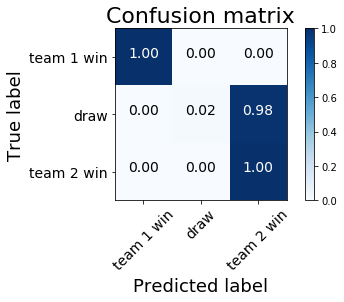

In [33]:
from utils.evaluate_betfair import *

evaluate_betfair()